##Aluno: Arthur Pinheiro Nascimento
###DRE: 121122575








In [ ]:
#Bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt

#Problema 1
###Qual deve ser o ganho anual se alguém quiser dobrar seu dinheiro em sete anos?

---

Seja $R_n$ o total ganho em 1 ano de uma pessoa qualquer em um ano $n=0,1,2,3,4,...$ e $r/q$ a razão da PA/PG, respectivamente. Queremos que $R_7=2R_0$. A pessoa em questão pode ter 2 tipos de ganho, geométrico ou aritmético, as fórmulas para os casos são (também pode ser modelado na forma de EDO):

*   Aritmético: $R_n=R_0 + r*n$
*   Geomeétrico: $R_n = R_0*q^n$


---


No caso linear, para ele duplicar seu dinheiro em 7 anos, teremos 2 equações:
$$\begin{cases}
R_7=2R_0 (i)\\
R_7= R_0 + r*7(ii)
\end{cases}$$
Fazendo (ii) - (i) temos que

$$0=-R_0+r*7$$

Rearranjando:

$$r = \frac{R_0}{7}$$

Ou seja, o ganho por ano tem que ser igual à 1 sétimo da quantia inicial.


---


Agora, no caso exponencial, também teremos duas equações
$$\begin{cases}
R_7=2R_0 (i)\\
R_7= R_0*q^7(ii)
\end{cases}$$
Fazendo (ii) - (i) temos que

$$0=R_0*q^7 - 2R_0\\
  2R_0 = R_0*q^7\\
  2=q^7\\
$$

Portanto a razão de crescimento tem que ser igual à raiz sétima de 2.


---


Por fim, o problema também pode ser modelado como uma EDO:
$$
\begin{cases}
M(7)=2M(0) \\
\frac{dM}{dt}=kM
\end{cases}
$$

A solução é dada como $M(t)=M(0)e^{kt}$, como M(7) = 2M(0), temos:
$$
2M(0)=M(0)e^{7k}\\
2=e^{7k}\\
k=\frac{ln(2)}{7}≈0.09902
$$
Portanto, ele deve ganhar $≈0.09902$ em cima do que possui na conta por ano para duplicar seu dinheiro em 7 anos.


#Problema 2
###Em uma pesquisa de dinâmica populacional de besouros, você estima que o tamanho da população seja de 3.000. Ao longo do mês, você registra 400 nascimentos e 150 profundidades. Estime k e calcule a previsão da dinâmica populacional em 6 meses.


---


No caso, isso pode ser modelado como uma EDO:
$$
\begin{cases}
\frac{db}{dt} = kb\\
b(0) = 3.000\\
b(1) = 3.250
\end{cases}
$$

Então:

$$\frac{dB}{db}=kdt$$
Integrando dos dois lados ficamos com a solução:
$$ln(b)=kt + C ⇔ b = Ce^{kt}$$


Como $b(0)= 3000 ⇒b = 3.000e^{kt}$ e $3250=3000e^k⇒k=ln(13/12)≈0.0800427$
Portanto:
$$
b(t) = 3.000(\frac{13}{12})^t\\
b(6) = 3.000(\frac{13}{12})^6 ≈4849 (depois\ de\ 6\ meses)
$$

#Problema 3

Valor de k: 0.1
Valor de kk: 0.8368321002053125
Erro médio entre k e kk: 102.65563909082961


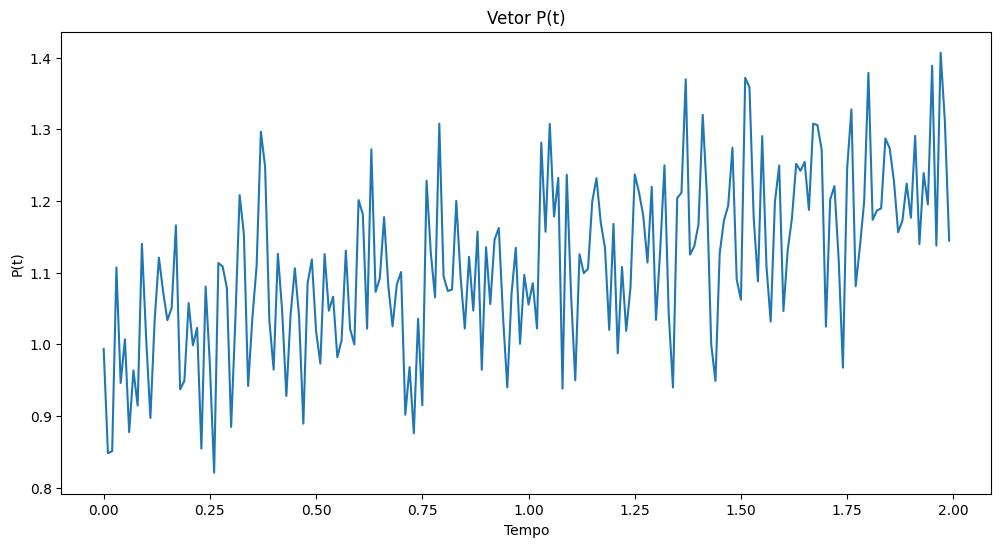

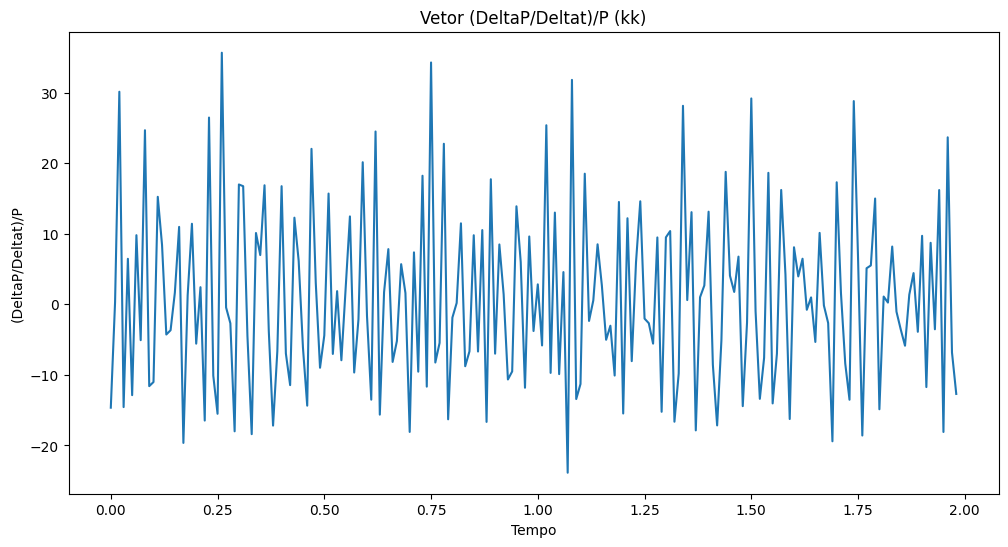

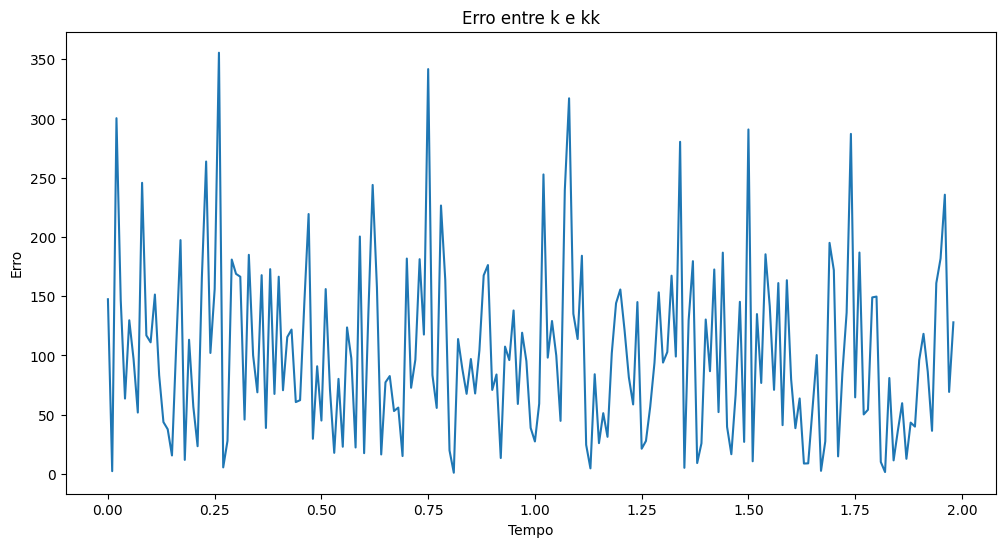

População em t = 2.0: 1.2214027581601699


In [ ]:
# Função para calcular o vetor P(t)
def calcular_P(k, Po, N, deltat, epsilon):
    t = np.arange(0, N * 2 * deltat, deltat)
    eta = np.random.normal(0, epsilon, len(t))
    P = Po * np.exp(k * t) + eta
    return t, P

# Função para calcular o vetor (DeltaP/Deltat)/P
def calcular_kk(t, P, deltat):
    delta_P = np.diff(P)
    delta_t = np.diff(t)
    kk = delta_P / delta_t / P[:-1]
    return kk

# Função para calcular o erro entre k e kk
def calcular_erro(k, kk):
    erro = np.abs(k - kk) / np.abs(k)
    return erro

# Parâmetros de entrada
k = 0.1
Po = 1.0
N = 100
deltat = 0.01
epsilon = 0.1

# Calcula o vetor P(t)
t, P = calcular_P(k, Po, N, deltat, epsilon)

# Calcula o vetor (DeltaP/Deltat)/P
kk = calcular_kk(t, P, deltat)

# Calcula o erro entre k e kk
erro = calcular_erro(k, kk)

# Imprime o valor de k, kk e o erro
print(f"Valor de k: {k}")
print(f"Valor de kk: {np.mean(kk)}")
print(f"Erro médio entre k e kk: {np.mean(erro)}")

# Plota P(t)
plt.figure(figsize=(12, 6))
plt.plot(t, P)
plt.xlabel('Tempo')
plt.ylabel('P(t)')
plt.title('Vetor P(t)')
plt.show()

# Plota kk
plt.figure(figsize=(12, 6))
plt.plot(t[:-1], kk)
plt.xlabel('Tempo')
plt.ylabel('(DeltaP/Deltat)/P')
plt.title('Vetor (DeltaP/Deltat)/P (kk)')
plt.show()

# Plota o erro
plt.figure(figsize=(12, 6))
plt.plot(t[:-1], erro)
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro entre k e kk')
plt.show()

# Calcula a população para t = 2*N
t_final = 2 * N * deltat
P_final = Po * np.exp(k * t_final)
print(f"População em t = {t_final}: {P_final}")


#Problema 4
###Uma amostra de algas marinhas unicelulares forneceu uma estimativa de 100.000 células nos dados iniciais. Dez dias depois, o tamanho da população foi estimado em 500.000 células. Calcule a taxa de crescimento assumindo crescimento exponencial.

---


$$
\begin{cases}
C(0)= 10^5\\
C(10)= 5*10^5\\
\frac{dC}{dt}=kC
\end{cases}
$$

Com essas informações sabemos que C é dado como $C(t)=10^5*e^{kt}$.
Como sabemos também o valor em C(10):

$$
5=e^{10k}
$$
Portanto a taxa de crescimento é:
$$
k=\frac{ln(5)}{10}
$$

#Problema 5
###Os glóbulos vermelhos são produzidos na medula óssea a uma taxa de m células por dia. Eles têm uma taxa de mortalidade dependente da densidade de d por dia. Formule um modelo matemático adequado para este processo e discuta a solução.

---

A taxa de produção de glóbulos vermelhos na medula óssea é constante e igual a m células por dia. A taxa de mortalidade dos glóbulos vermelhos é dependente da densidade, ou seja, é proporcional a d. Vamos denotar a constante de mortalidade proporcional como α (alpha). Portanto, a taxa de mortalidade é α * R(t) células por dia.

Com base nisso, podemos escrever a equação diferencial para a densidade de glóbulos vermelhos como:

$$
\frac{dR}{dt}=Taxa\ de\ produção - Taxa\ de\ morte\\
\frac{dR}{dt}=m-α*R(t)
$$

Esta é uma equação diferencial de primeira ordem que descreve a variação da densidade de glóbulos vermelhos R(t) no tempo t. A solução dessa equação diferencial pode ser encontrada usando métodos de cálculo ou software de simulação. A solução geral dessa equação é uma função R(t) que representa como a densidade de glóbulos vermelhos muda ao longo do tempo, levando em consideração a produção constante e a mortalidade dependente da densidade.

A solução dessa equação pode ser interpretada como a dinâmica da população de glóbulos vermelhos na medula óssea ao longo do tempo, levando em conta a produção e a taxa de mortalidade. A taxa de mortalidade α * R(t) aumentará à medida que a densidade de glóbulos vermelhos R(t) aumentar, o que é uma característica realista, já que uma densidade maior de glóbulos vermelhos pode levar a uma maior competição e, consequentemente, a uma taxa de mortalidade mais alta.